<a href="https://colab.research.google.com/github/Ridham-suhagiya/Machine-learning/blob/master/Machine-learning/CNN/Gan/Mnist-handwritten-dataset/MNIST_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***IMPORTING DATA***

In [28]:
import matplotlib.pyplot as plt
from keras.datasets.mnist import load_data

***lOADING DATA***

In [29]:
(train_x,train_y),(test_x,test_y)= load_data()

In [30]:
#shape
print('train_x:',train_x.shape,' ','train_y:',train_y.shape)

train_x: (60000, 28, 28)   train_y: (60000,)


In [31]:
print('test_x:',test_x.shape,' ','test_y:',test_y.shape)

test_x: (10000, 28, 28)   test_y: (10000,)


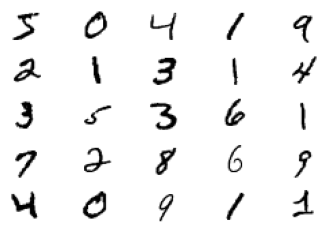

In [32]:
#ploting the data
for i in range(25):
  plt.subplot(5,5,1+ i)
  plt.axis('off')
  plt.imshow(train_x[i],cmap = 'gray_r')
plt.show()

In [33]:
# libraries for defining the discriminator model
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model

In [34]:
# descriminator
def descriminator_model():
  model = Sequential()
  model.add(Conv2D(64,(3,3), padding='same', input_shape= (28,28,1)))
  model.add(LeakyReLU(alpha = 0.2))
  model.add(Dropout(0.4))
  model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(1, activation='sigmoid'))
  opt = Adam(learning_rate=0.0002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model

In [35]:
# model
d_model = descriminator_model()

In [36]:
# Visualising the model
d_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 28, 28, 64)        0         
                                                                 
 dropout_2 (Dropout)         (None, 28, 28, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 12544)            

In [37]:
#data preparation
from numpy import expand_dims
from numpy import ones
from numpy import zeros
from numpy.random import rand
from numpy.random import randint
# Datasets
def generate_data(train_x):
  x = expand_dims(train_x,axis = -1)
  x = x.astype('float32')
  x = x/255.0
  return x
# real data
def real_samples(datasets,samples):
   x =  randint(0,datasets.shape[0],samples)
   nums = datasets[x]
   y = ones((samples,1))
   return nums,y
#Fake data
def fake_samples(samples):
   x =  rand(28*28*samples)
   x = x.reshape((samples,28,28,1))
   y = zeros((samples,1))
   return x,y

In [38]:
def train_model_with_data(model,datasets,iteration = 100 , batchs = 256):
  batch = batchs//2
  for i in range(iteration):
    # generate real data
    real_x, real_y  = real_samples(datasets,batch)
    #train model
    _, real = model.train_on_batch(real_x,real_y)
    # generate fake data
    fake_x,fake_y = fake_samples(batch)
    #train model
    _,fake = model.train_on_batch(fake_x,fake_y)
    
    print(f'itr:{i+1} real : {real*100}   fake : {fake*100}')



In [39]:
datasets = generate_data(train_x)

In [40]:
# Turning off the trainable parameters


In [41]:
# Visualising the model
d_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 28, 28, 64)        0         
                                                                 
 dropout_2 (Dropout)         (None, 28, 28, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 12544)            

In [42]:
# Creating the  generator model
from keras.layers import Reshape
from keras.layers import Conv2DTranspose
def generator_model(latent_dim):
  model = Sequential()
  model.add(Dense(128*7*7,input_dim = latent_dim))
  model.add(LeakyReLU(alpha = 0.2))
  model.add(Reshape((7,7,128)))
  model.add(Conv2DTranspose(128,(4,4),strides = (2,2),padding = 'same'))
  model.add(LeakyReLU(alpha = 0.2))
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha = 0.2))
  model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
  return model

In [43]:
# Creating a a latent point for the generator function
latent_dim = 100
g_model = generator_model(latent_dim)

In [44]:
# Visualising the model
g_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6272)              633472    
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 14, 14, 128)      262272    
 ranspose)                                                       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 28, 28, 128)      262272    
 ranspose)                                            

In [45]:
from numpy.random import randn
# Generating latent points
def generate_latent_points(n_samples,latent):
  x = randn(n_samples*latent)
  x = x.reshape(n_samples,latent)
  return x
# generating  fake samples with the help of generator model
def generate_fake_samples(g_model,n_samples,latent):
  x_input = generate_latent_points(n_samples,latent)
  x = g_model.predict(x_input)
  y = zeros((n_samples,1))
  return x,y

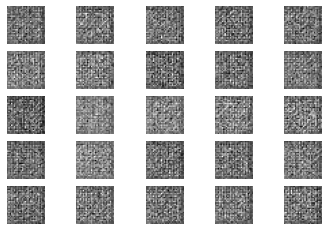

In [46]:
# 25 samples
n_samples = 25
#generating fake samples
X,_ = generate_fake_samples(g_model,n_samples,latent_dim)
# ploting these fake samples
for i in range(n_samples):
  plt.subplot(5,5,1+i)
  plt.axis('off')
  plt.imshow(X[i,:,:,0],cmap = 'gray_r')
plt.show()

In [47]:
# Creating the final model which is made up by stacking discriminator model and generator model
def gan_model(model1,model2):
  model1.trainable = False
  model  = Sequential()
  model.add(model2)
  model.add(model1)
  opt = Adam(lr=0.0002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt)
  return model

In [48]:
gan_model = gan_model(d_model,g_model)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [49]:
gan_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 28, 28, 1)         1164289   
                                                                 
 sequential_3 (Sequential)   (None, 1)                 50113     
                                                                 
Total params: 1,214,402
Trainable params: 1,164,289
Non-trainable params: 50,113
_________________________________________________________________


In [50]:
from numpy import vstack

def summarise(epoch,d_model,g_model,dataset,latent_dim,n_samples = 100):
  # fetch real images 
  real_x,real_y = real_samples(datasets,n_samples)
  # evaluate descriminator real images
  _, acc_real = d_model.evaluate(real_x,real_y,verbose = 0)
  # Create fake samples
  fake_x,fake_y  = generate_fake_samples(g_model,n_samples,latent_dim)
  # evaluate descriminator on fake images 
  _, acc_fake = d_model.evaluate(fake_x,fake_y,verbose = 0)
  print(f"""Descriminator model acc on real : {acc_real* 100}        Descriminator model acc on fake : {acc_fake*100}""")

def visualise_generator(g_model):
  # generating latent points for testing 
  input = generate_latent_points(25,100)
  # storing the prediction of the model over the inputs 
  x = g_model.predict(input)
  # ploting the output of the model
  for i in range(25):
    plt.subplot(5,5,1+i)
    plt.axis('off')
    plt.imshow(X[i,:,:,0],cmap = 'gray_r')
  plt.show()
def train(d_model,g_model,gan_model,datasets,epochs = 100 , batchs = 256):
  batch = batchs//2
  batch_per_epoch = datasets.shape[0]//batchs
  for epoch in range(epochs):
    for j in range(batch_per_epoch):
      # generate real data
      real_x, real_y  = real_samples(datasets,batch)
      # generate fake data
      fake_x ,fake_y  = generate_fake_samples(g_model,batch,latent_dim)
      # club fake and real data together
      x, y = vstack((real_x,fake_x)),vstack((real_y,fake_y))
      # Train descriminators weight
      dloss,_ = d_model.train_on_batch(x,y)
      # create latent data
      x_gan = generate_latent_points(batch,latent_dim)
      y_gan = ones((batch,1))
      # update generator via the descriminator's error
      gloss = gan_model.train_on_batch(x_gan,y_gan)
    summarise(epoch,d_model,g_model,datasets,latent_dim)
    # generating latent points for testing 
    input = generate_latent_points(25,100)
    # storing the prediction of the model over the inputs 
    x = g_model.predict(input)
    # ploting the output of the model
    for i in range(25):
      plt.subplot(5,5,1+i)
      plt.axis('off')
      plt.imshow(x[i,:,:,0],cmap = 'gray_r')
    plt.show()
    print('d_model loss:',dloss,'g_model loss:', gloss,epoch)


      
      
 
   
    

Descriminator model acc on real : 95.99999785423279        Descriminator model acc on fake : 69.9999988079071


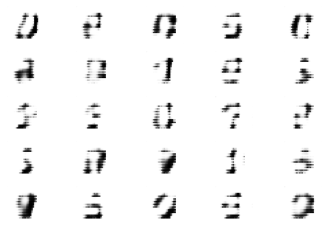

d_model loss: 0.4828299582004547 g_model loss: 0.9599031805992126 0
Descriminator model acc on real : 40.00000059604645        Descriminator model acc on fake : 56.00000023841858


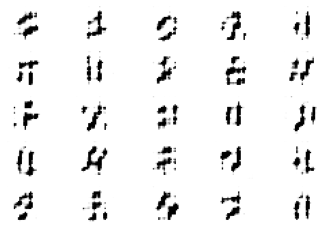

d_model loss: 0.7541278600692749 g_model loss: 0.6914324760437012 1
Descriminator model acc on real : 83.99999737739563        Descriminator model acc on fake : 62.00000047683716


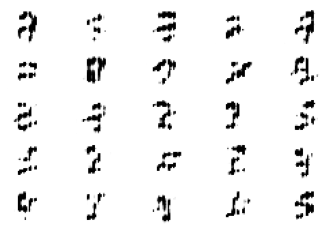

d_model loss: 0.6471430063247681 g_model loss: 0.7149267196655273 2
Descriminator model acc on real : 81.99999928474426        Descriminator model acc on fake : 68.00000071525574


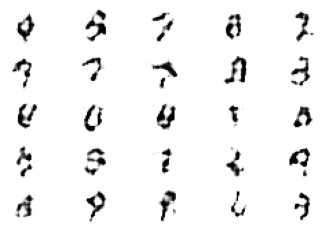

d_model loss: 0.649630606174469 g_model loss: 0.7255521416664124 3
Descriminator model acc on real : 72.00000286102295        Descriminator model acc on fake : 66.00000262260437


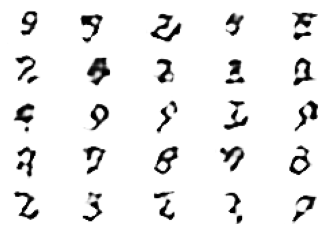

d_model loss: 0.6710261106491089 g_model loss: 0.7151377201080322 4
Descriminator model acc on real : 67.00000166893005        Descriminator model acc on fake : 91.00000262260437


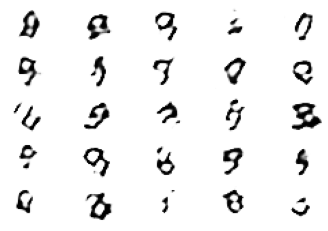

d_model loss: 0.6574717164039612 g_model loss: 0.7362154126167297 5
Descriminator model acc on real : 61.000001430511475        Descriminator model acc on fake : 75.0


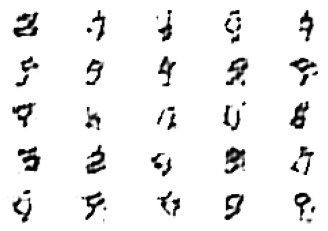

d_model loss: 0.6773216128349304 g_model loss: 0.7256619930267334 6
Descriminator model acc on real : 68.00000071525574        Descriminator model acc on fake : 74.00000095367432


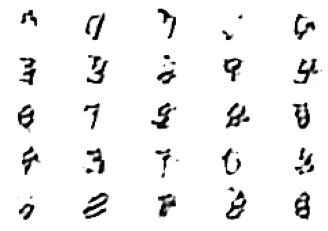

d_model loss: 0.6662192940711975 g_model loss: 0.72588050365448 7
Descriminator model acc on real : 63.999998569488525        Descriminator model acc on fake : 82.99999833106995


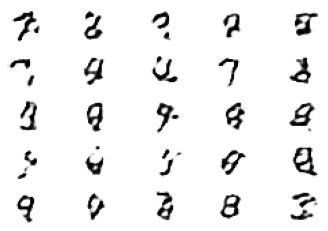

d_model loss: 0.6705964207649231 g_model loss: 0.7339534163475037 8
Descriminator model acc on real : 34.00000035762787        Descriminator model acc on fake : 100.0


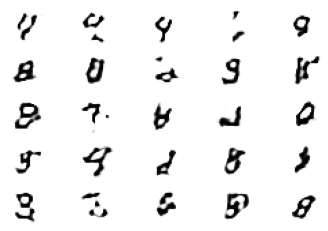

d_model loss: 0.6636085510253906 g_model loss: 0.8000255823135376 9
Descriminator model acc on real : 18.99999976158142        Descriminator model acc on fake : 98.00000190734863


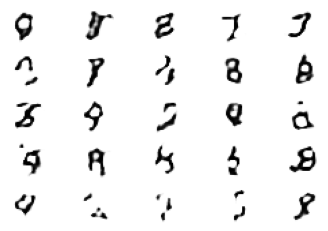

d_model loss: 0.6671093106269836 g_model loss: 0.801240086555481 10
Descriminator model acc on real : 56.99999928474426        Descriminator model acc on fake : 86.00000143051147


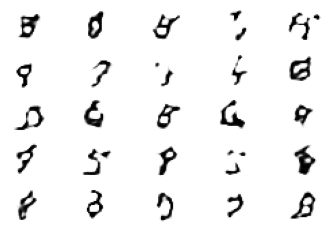

d_model loss: 0.6660579442977905 g_model loss: 0.7123217582702637 11
Descriminator model acc on real : 99.00000095367432        Descriminator model acc on fake : 15.000000596046448


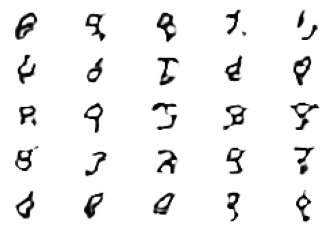

d_model loss: 0.6683286428451538 g_model loss: 0.6419152021408081 12
Descriminator model acc on real : 68.00000071525574        Descriminator model acc on fake : 79.00000214576721


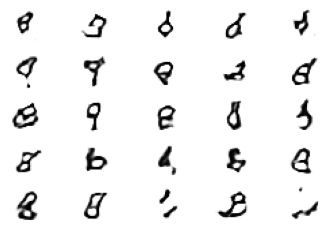

d_model loss: 0.6765057444572449 g_model loss: 0.7168782353401184 13
Descriminator model acc on real : 30.000001192092896        Descriminator model acc on fake : 95.99999785423279


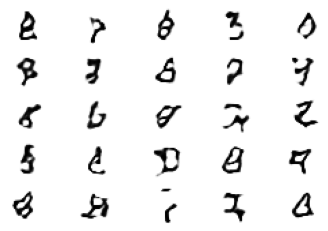

d_model loss: 0.6745359301567078 g_model loss: 0.7991113066673279 14
Descriminator model acc on real : 74.00000095367432        Descriminator model acc on fake : 67.00000166893005


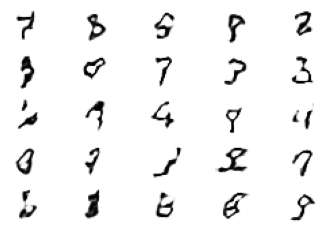

d_model loss: 0.6831725835800171 g_model loss: 0.6908862590789795 15
Descriminator model acc on real : 7.999999821186066        Descriminator model acc on fake : 100.0


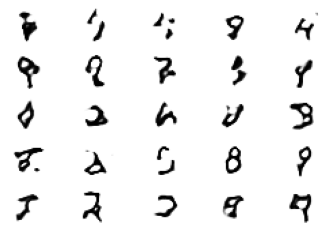

d_model loss: 0.6715743541717529 g_model loss: 0.8188781142234802 16
Descriminator model acc on real : 23.999999463558197        Descriminator model acc on fake : 97.00000286102295


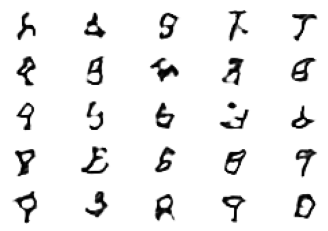

d_model loss: 0.6602485179901123 g_model loss: 0.8008294701576233 17
Descriminator model acc on real : 75.99999904632568        Descriminator model acc on fake : 69.9999988079071


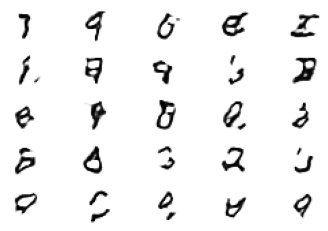

d_model loss: 0.6695491075515747 g_model loss: 0.7017641067504883 18
Descriminator model acc on real : 68.99999976158142        Descriminator model acc on fake : 81.99999928474426


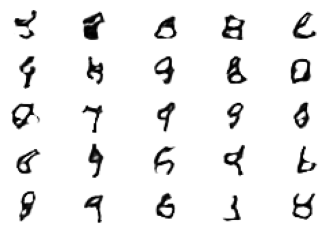

d_model loss: 0.6586273908615112 g_model loss: 0.7371927499771118 19
Descriminator model acc on real : 62.00000047683716        Descriminator model acc on fake : 87.99999952316284


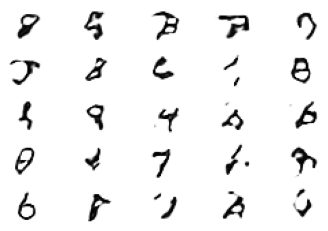

d_model loss: 0.6776345372200012 g_model loss: 0.7241065502166748 20
Descriminator model acc on real : 83.99999737739563        Descriminator model acc on fake : 66.00000262260437


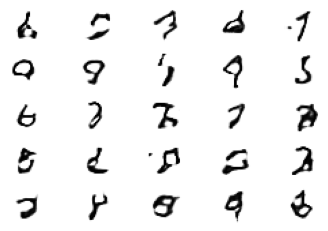

d_model loss: 0.6566885709762573 g_model loss: 0.7097504734992981 21
Descriminator model acc on real : 75.0        Descriminator model acc on fake : 63.999998569488525


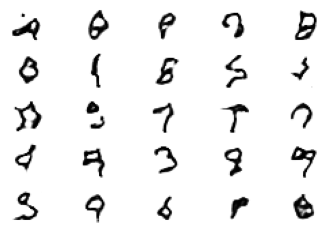

d_model loss: 0.6717855930328369 g_model loss: 0.6837278604507446 22
Descriminator model acc on real : 100.0        Descriminator model acc on fake : 21.99999988079071


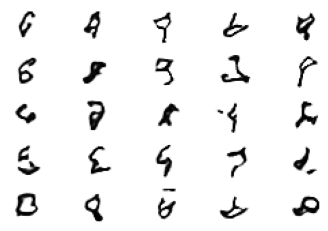

d_model loss: 0.6852728724479675 g_model loss: 0.6340030431747437 23
Descriminator model acc on real : 89.99999761581421        Descriminator model acc on fake : 57.999998331069946


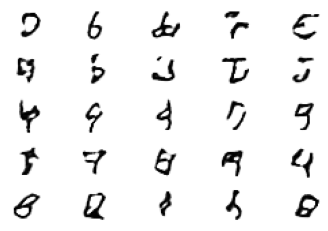

d_model loss: 0.6668028831481934 g_model loss: 0.6786818504333496 24
Descriminator model acc on real : 43.00000071525574        Descriminator model acc on fake : 94.9999988079071


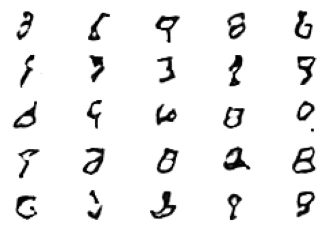

d_model loss: 0.6683225035667419 g_model loss: 0.7771113514900208 25
Descriminator model acc on real : 0.0        Descriminator model acc on fake : 100.0


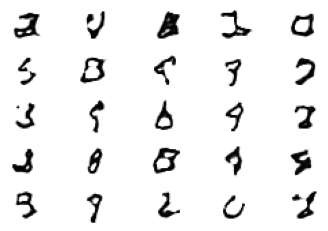

d_model loss: 0.664321780204773 g_model loss: 1.0610562562942505 26
Descriminator model acc on real : 30.000001192092896        Descriminator model acc on fake : 97.00000286102295


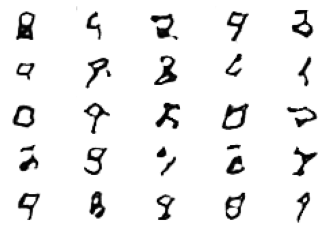

d_model loss: 0.6595004200935364 g_model loss: 0.7853528261184692 27
Descriminator model acc on real : 67.00000166893005        Descriminator model acc on fake : 88.99999856948853


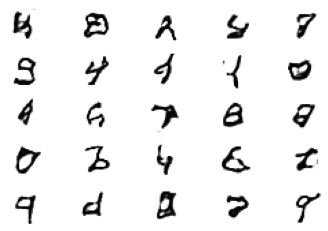

d_model loss: 0.6859032511711121 g_model loss: 0.7382509708404541 28
Descriminator model acc on real : 46.99999988079071        Descriminator model acc on fake : 91.00000262260437


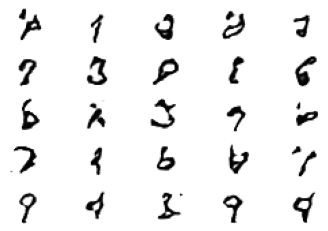

d_model loss: 0.6957173347473145 g_model loss: 0.7523260116577148 29
Descriminator model acc on real : 23.999999463558197        Descriminator model acc on fake : 95.99999785423279


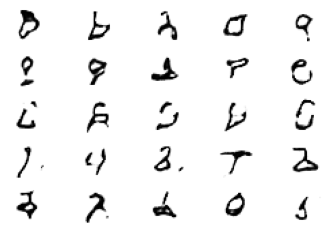

d_model loss: 0.6618613004684448 g_model loss: 0.7653387188911438 30
Descriminator model acc on real : 83.99999737739563        Descriminator model acc on fake : 52.99999713897705


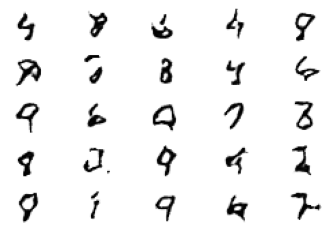

d_model loss: 0.6729007363319397 g_model loss: 0.6789491176605225 31
Descriminator model acc on real : 81.99999928474426        Descriminator model acc on fake : 56.00000023841858


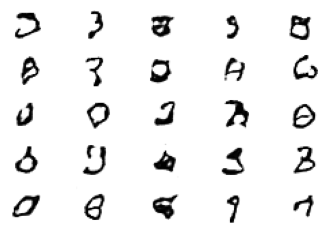

d_model loss: 0.6651902794837952 g_model loss: 0.674931526184082 32
Descriminator model acc on real : 50.999999046325684        Descriminator model acc on fake : 86.00000143051147


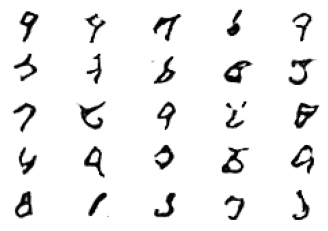

d_model loss: 0.6856580972671509 g_model loss: 0.7235680222511292 33
Descriminator model acc on real : 43.00000071525574        Descriminator model acc on fake : 91.00000262260437


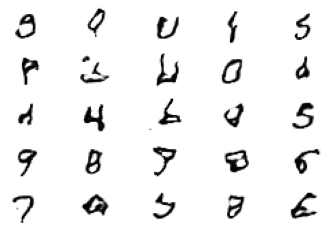

d_model loss: 0.6869151592254639 g_model loss: 0.7544078826904297 34
Descriminator model acc on real : 43.99999976158142        Descriminator model acc on fake : 100.0


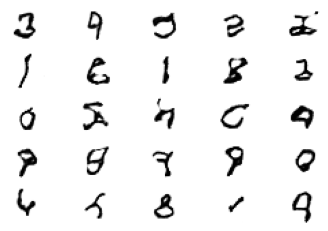

d_model loss: 0.6853499412536621 g_model loss: 0.7658507823944092 35
Descriminator model acc on real : 99.00000095367432        Descriminator model acc on fake : 31.00000023841858


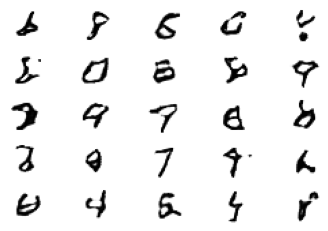

d_model loss: 0.6661539673805237 g_model loss: 0.6490188837051392 36
Descriminator model acc on real : 83.99999737739563        Descriminator model acc on fake : 58.99999737739563


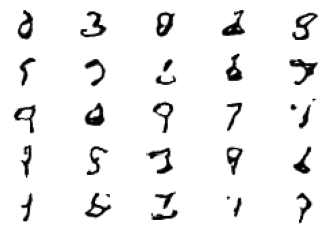

d_model loss: 0.6777903437614441 g_model loss: 0.680391788482666 37
Descriminator model acc on real : 52.99999713897705        Descriminator model acc on fake : 88.99999856948853


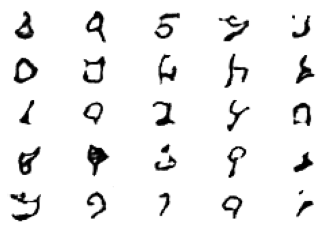

d_model loss: 0.6752647757530212 g_model loss: 0.728682279586792 38
Descriminator model acc on real : 50.0        Descriminator model acc on fake : 88.99999856948853


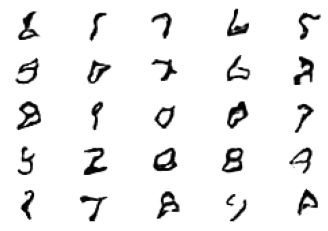

d_model loss: 0.6620845794677734 g_model loss: 0.723281741142273 39
Descriminator model acc on real : 67.00000166893005        Descriminator model acc on fake : 81.99999928474426


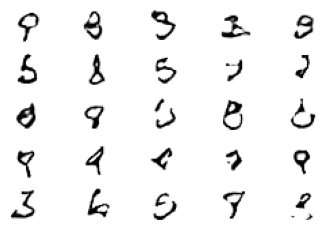

d_model loss: 0.6807242035865784 g_model loss: 0.6934337615966797 40
Descriminator model acc on real : 31.00000023841858        Descriminator model acc on fake : 100.0


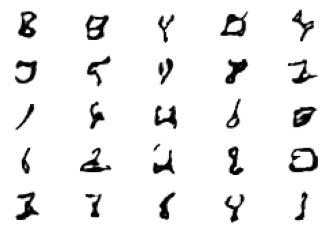

d_model loss: 0.6737648248672485 g_model loss: 0.7682910561561584 41
Descriminator model acc on real : 14.000000059604645        Descriminator model acc on fake : 99.00000095367432


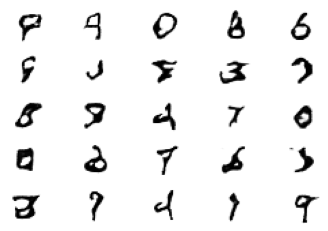

d_model loss: 0.6857324838638306 g_model loss: 0.8058604001998901 42
Descriminator model acc on real : 3.999999910593033        Descriminator model acc on fake : 100.0


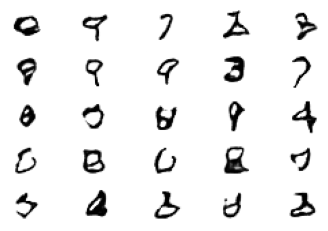

d_model loss: 0.6878002882003784 g_model loss: 0.8130826950073242 43
Descriminator model acc on real : 56.99999928474426        Descriminator model acc on fake : 82.99999833106995


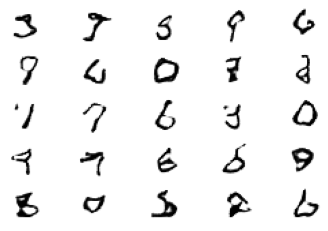

d_model loss: 0.6824492812156677 g_model loss: 0.7053460478782654 44
Descriminator model acc on real : 47.999998927116394        Descriminator model acc on fake : 91.00000262260437


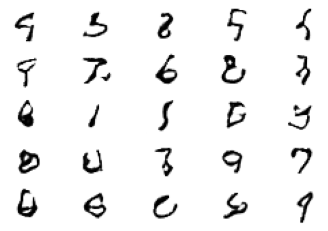

d_model loss: 0.6813280582427979 g_model loss: 0.7191904187202454 45
Descriminator model acc on real : 56.99999928474426        Descriminator model acc on fake : 92.00000166893005


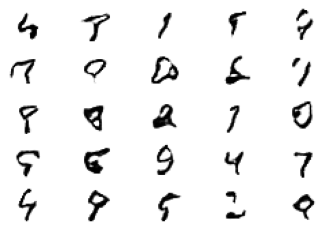

d_model loss: 0.6778408885002136 g_model loss: 0.7531635761260986 46
Descriminator model acc on real : 76.99999809265137        Descriminator model acc on fake : 77.99999713897705


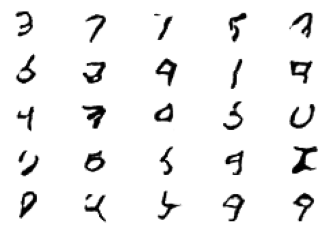

d_model loss: 0.6821106672286987 g_model loss: 0.7152433395385742 47
Descriminator model acc on real : 66.00000262260437        Descriminator model acc on fake : 77.99999713897705


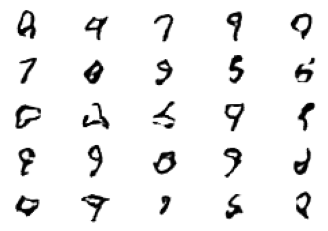

d_model loss: 0.6714304089546204 g_model loss: 0.699532151222229 48
Descriminator model acc on real : 46.99999988079071        Descriminator model acc on fake : 83.99999737739563


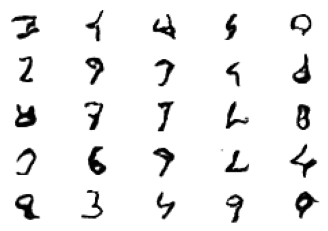

d_model loss: 0.6631218194961548 g_model loss: 0.7150439620018005 49
Descriminator model acc on real : 49.000000953674316        Descriminator model acc on fake : 89.99999761581421


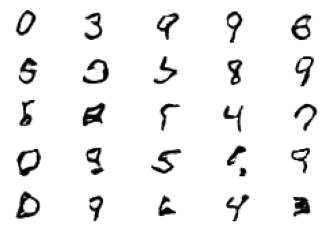

d_model loss: 0.6886748671531677 g_model loss: 0.7139829397201538 50
Descriminator model acc on real : 44.999998807907104        Descriminator model acc on fake : 92.00000166893005


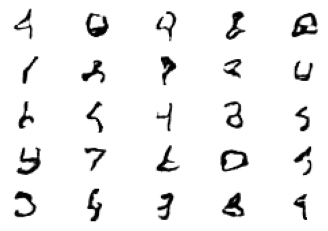

d_model loss: 0.6627546548843384 g_model loss: 0.7416175007820129 51
Descriminator model acc on real : 31.00000023841858        Descriminator model acc on fake : 97.00000286102295


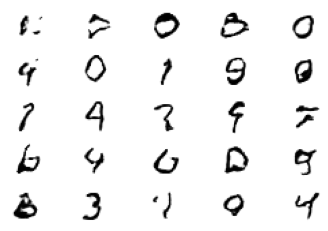

d_model loss: 0.684873104095459 g_model loss: 0.7691221833229065 52
Descriminator model acc on real : 58.99999737739563        Descriminator model acc on fake : 77.99999713897705


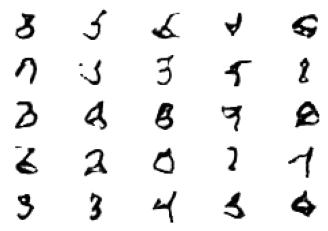

d_model loss: 0.6900243163108826 g_model loss: 0.6920868754386902 53
Descriminator model acc on real : 25.999999046325684        Descriminator model acc on fake : 97.00000286102295


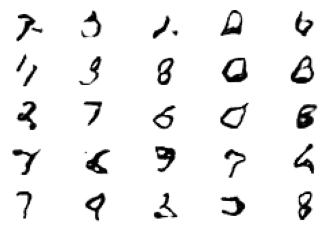

d_model loss: 0.6615887880325317 g_model loss: 0.7705046534538269 54
Descriminator model acc on real : 30.000001192092896        Descriminator model acc on fake : 93.99999976158142


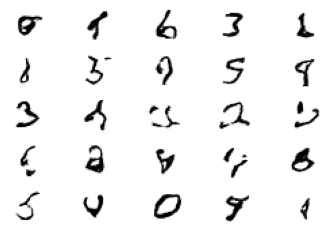

d_model loss: 0.6787410378456116 g_model loss: 0.7620524764060974 55
Descriminator model acc on real : 37.00000047683716        Descriminator model acc on fake : 93.99999976158142


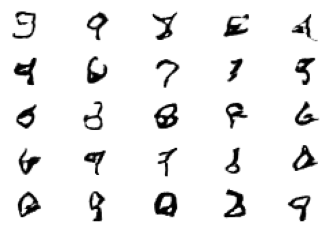

d_model loss: 0.685222327709198 g_model loss: 0.746440052986145 56
Descriminator model acc on real : 67.00000166893005        Descriminator model acc on fake : 85.00000238418579


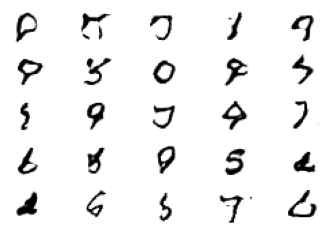

d_model loss: 0.6727639436721802 g_model loss: 0.694315493106842 57
Descriminator model acc on real : 67.00000166893005        Descriminator model acc on fake : 73.00000190734863


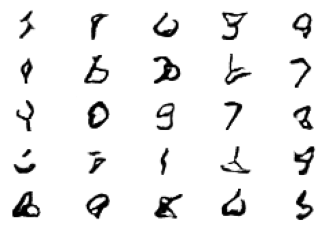

d_model loss: 0.6819750666618347 g_model loss: 0.678780734539032 58
Descriminator model acc on real : 85.00000238418579        Descriminator model acc on fake : 50.999999046325684


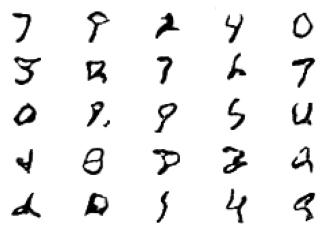

d_model loss: 0.6795067191123962 g_model loss: 0.666306734085083 59
Descriminator model acc on real : 5.999999865889549        Descriminator model acc on fake : 100.0


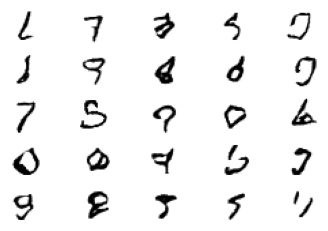

d_model loss: 0.6767768263816833 g_model loss: 0.8142504692077637 60
Descriminator model acc on real : 43.99999976158142        Descriminator model acc on fake : 91.00000262260437


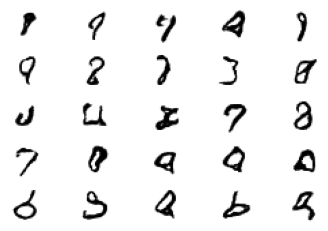

d_model loss: 0.6869422197341919 g_model loss: 0.7102482318878174 61
Descriminator model acc on real : 15.000000596046448        Descriminator model acc on fake : 99.00000095367432


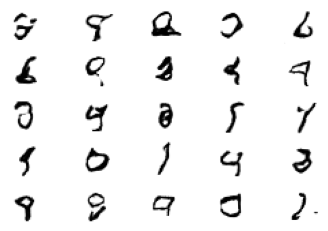

d_model loss: 0.6846722960472107 g_model loss: 0.8040604591369629 62
Descriminator model acc on real : 10.999999940395355        Descriminator model acc on fake : 100.0


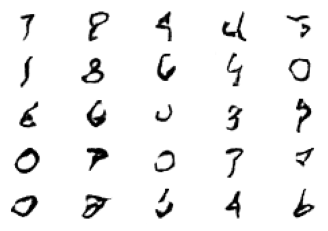

d_model loss: 0.697085440158844 g_model loss: 0.7929624319076538 63
Descriminator model acc on real : 55.000001192092896        Descriminator model acc on fake : 81.99999928474426


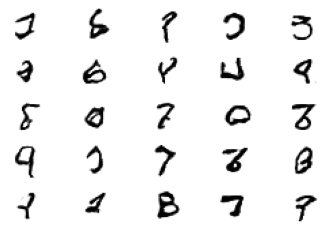

d_model loss: 0.6859090328216553 g_model loss: 0.7041490077972412 64
Descriminator model acc on real : 62.00000047683716        Descriminator model acc on fake : 73.00000190734863


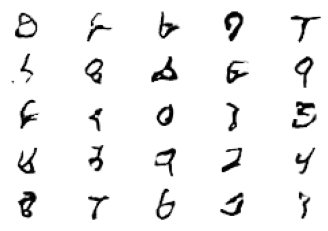

d_model loss: 0.6859360933303833 g_model loss: 0.6966304183006287 65
Descriminator model acc on real : 28.00000011920929        Descriminator model acc on fake : 98.00000190734863


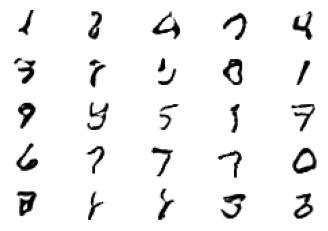

d_model loss: 0.6912605166435242 g_model loss: 0.740919291973114 66
Descriminator model acc on real : 58.99999737739563        Descriminator model acc on fake : 69.9999988079071


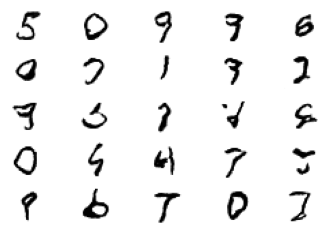

d_model loss: 0.6776065230369568 g_model loss: 0.6674118041992188 67
Descriminator model acc on real : 58.99999737739563        Descriminator model acc on fake : 70.99999785423279


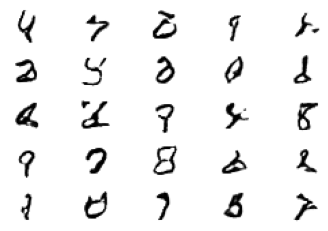

d_model loss: 0.6851810812950134 g_model loss: 0.688292920589447 68
Descriminator model acc on real : 37.99999952316284        Descriminator model acc on fake : 95.99999785423279


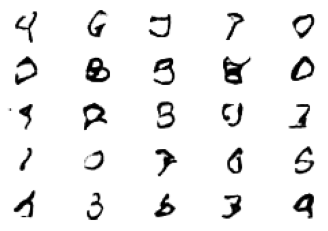

d_model loss: 0.6700820326805115 g_model loss: 0.7144542932510376 69
Descriminator model acc on real : 34.99999940395355        Descriminator model acc on fake : 95.99999785423279


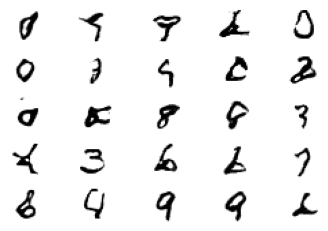

d_model loss: 0.6836596727371216 g_model loss: 0.7103224396705627 70
Descriminator model acc on real : 36.000001430511475        Descriminator model acc on fake : 95.99999785423279


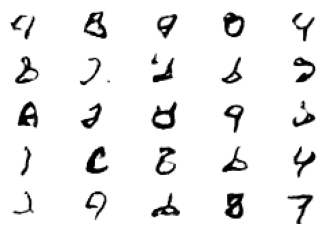

d_model loss: 0.6823611855506897 g_model loss: 0.7278116345405579 71
Descriminator model acc on real : 7.000000029802322        Descriminator model acc on fake : 100.0


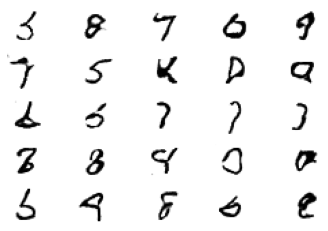

d_model loss: 0.6778976917266846 g_model loss: 0.7941125631332397 72
Descriminator model acc on real : 20.000000298023224        Descriminator model acc on fake : 98.00000190734863


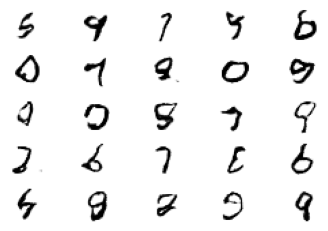

d_model loss: 0.6828351616859436 g_model loss: 0.766153872013092 73
Descriminator model acc on real : 57.999998331069946        Descriminator model acc on fake : 86.00000143051147


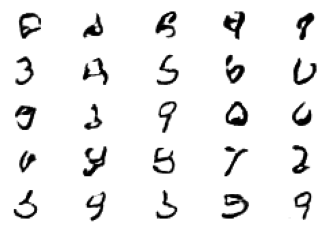

d_model loss: 0.6811901330947876 g_model loss: 0.6982293128967285 74
Descriminator model acc on real : 15.000000596046448        Descriminator model acc on fake : 99.00000095367432


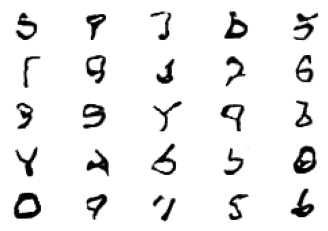

d_model loss: 0.6796155571937561 g_model loss: 0.7750172019004822 75
Descriminator model acc on real : 43.99999976158142        Descriminator model acc on fake : 89.99999761581421


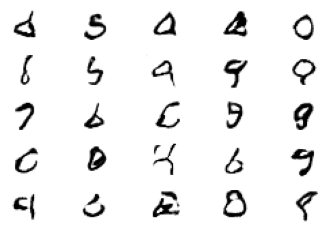

d_model loss: 0.6644284725189209 g_model loss: 0.7251443862915039 76
Descriminator model acc on real : 5.000000074505806        Descriminator model acc on fake : 100.0


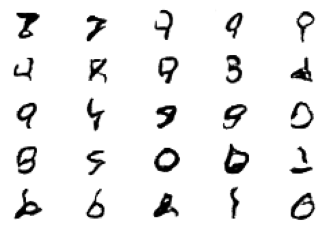

d_model loss: 0.6794800758361816 g_model loss: 0.7828006148338318 77
Descriminator model acc on real : 27.000001072883606        Descriminator model acc on fake : 98.00000190734863


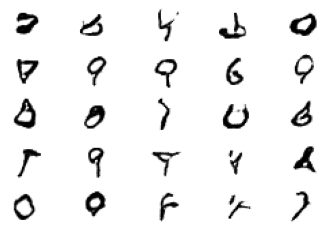

d_model loss: 0.6713581085205078 g_model loss: 0.707953691482544 78
Descriminator model acc on real : 7.999999821186066        Descriminator model acc on fake : 100.0


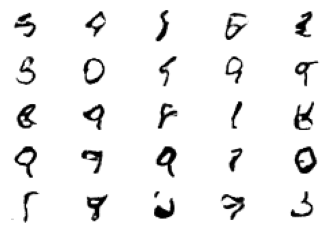

d_model loss: 0.6752433776855469 g_model loss: 0.802094042301178 79
Descriminator model acc on real : 44.999998807907104        Descriminator model acc on fake : 85.00000238418579


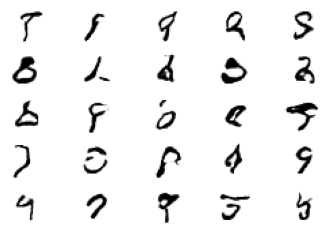

d_model loss: 0.6806430816650391 g_model loss: 0.6949615478515625 80
Descriminator model acc on real : 23.000000417232513        Descriminator model acc on fake : 97.00000286102295


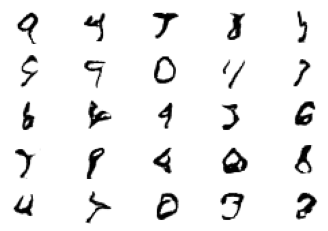

d_model loss: 0.6895921230316162 g_model loss: 0.7348054647445679 81
Descriminator model acc on real : 41.999998688697815        Descriminator model acc on fake : 86.00000143051147


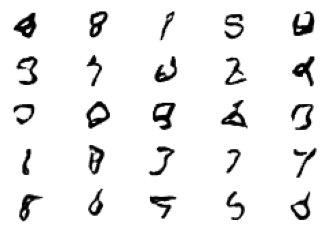

d_model loss: 0.6807283163070679 g_model loss: 0.7049859762191772 82
Descriminator model acc on real : 34.99999940395355        Descriminator model acc on fake : 86.00000143051147


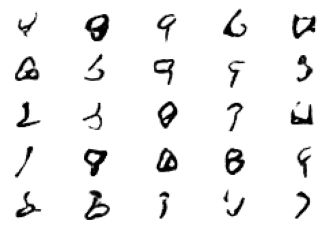

d_model loss: 0.6753414869308472 g_model loss: 0.7325806617736816 83
Descriminator model acc on real : 52.99999713897705        Descriminator model acc on fake : 81.99999928474426


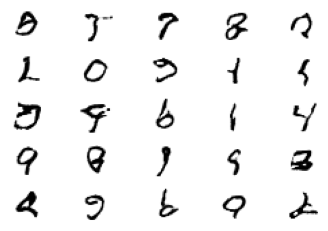

d_model loss: 0.6828142404556274 g_model loss: 0.6884538531303406 84
Descriminator model acc on real : 52.99999713897705        Descriminator model acc on fake : 82.99999833106995


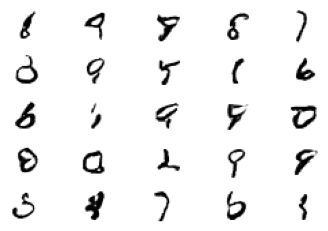

d_model loss: 0.6849554777145386 g_model loss: 0.6976504325866699 85
Descriminator model acc on real : 95.99999785423279        Descriminator model acc on fake : 27.000001072883606


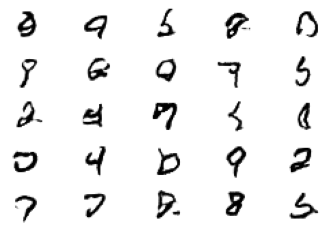

d_model loss: 0.68398118019104 g_model loss: 0.6291481256484985 86
Descriminator model acc on real : 21.99999988079071        Descriminator model acc on fake : 97.00000286102295


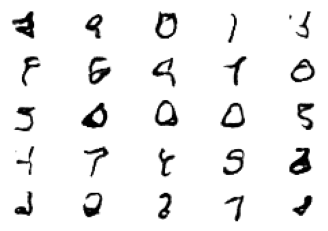

d_model loss: 0.674429178237915 g_model loss: 0.750481128692627 87
Descriminator model acc on real : 68.00000071525574        Descriminator model acc on fake : 62.99999952316284


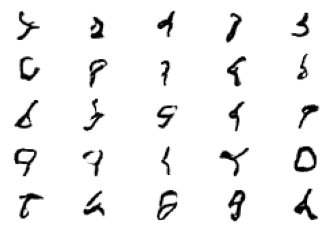

d_model loss: 0.6719567179679871 g_model loss: 0.6996390223503113 88
Descriminator model acc on real : 21.99999988079071        Descriminator model acc on fake : 97.00000286102295


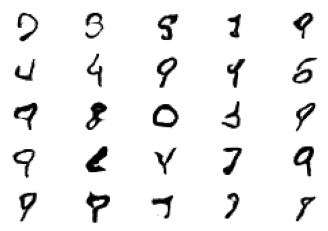

d_model loss: 0.6755402088165283 g_model loss: 0.7131620645523071 89
Descriminator model acc on real : 46.00000083446503        Descriminator model acc on fake : 91.00000262260437


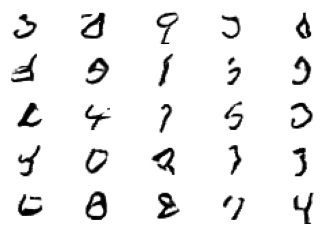

d_model loss: 0.6836458444595337 g_model loss: 0.7029961347579956 90
Descriminator model acc on real : 25.999999046325684        Descriminator model acc on fake : 94.9999988079071


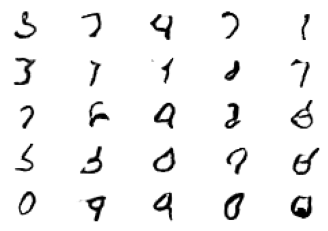

d_model loss: 0.6680700182914734 g_model loss: 0.7362619638442993 91
Descriminator model acc on real : 7.999999821186066        Descriminator model acc on fake : 100.0


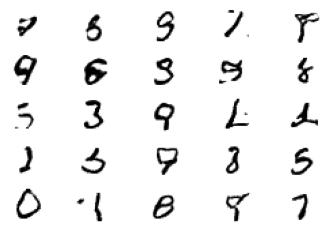

d_model loss: 0.6782222390174866 g_model loss: 0.7586174011230469 92
Descriminator model acc on real : 56.00000023841858        Descriminator model acc on fake : 75.0


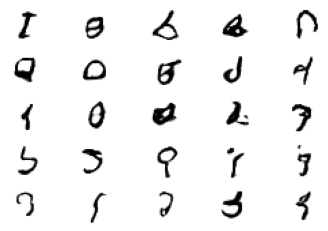

d_model loss: 0.6838528513908386 g_model loss: 0.6532361507415771 93
Descriminator model acc on real : 31.00000023841858        Descriminator model acc on fake : 97.00000286102295


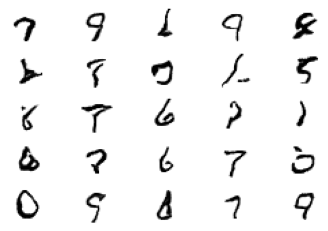

d_model loss: 0.6796942353248596 g_model loss: 0.7259207963943481 94
Descriminator model acc on real : 15.000000596046448        Descriminator model acc on fake : 99.00000095367432


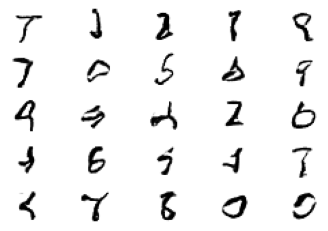

d_model loss: 0.7030579447746277 g_model loss: 0.7439874410629272 95
Descriminator model acc on real : 43.00000071525574        Descriminator model acc on fake : 81.00000023841858


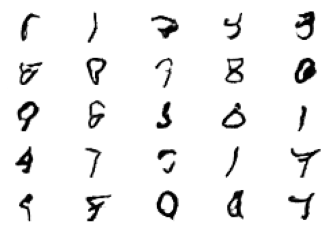

d_model loss: 0.6864140629768372 g_model loss: 0.6893390417098999 96
Descriminator model acc on real : 31.00000023841858        Descriminator model acc on fake : 95.99999785423279


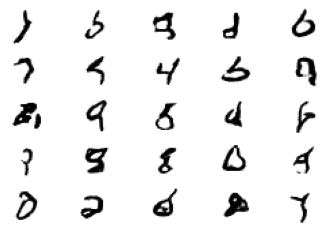

d_model loss: 0.6856197714805603 g_model loss: 0.694068431854248 97
Descriminator model acc on real : 10.000000149011612        Descriminator model acc on fake : 98.00000190734863


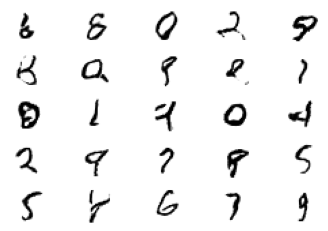

d_model loss: 0.6953689455986023 g_model loss: 0.7059402465820312 98
Descriminator model acc on real : 50.999999046325684        Descriminator model acc on fake : 89.99999761581421


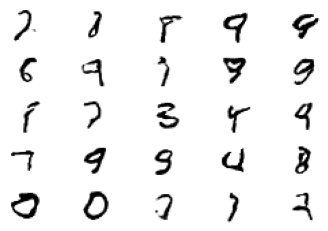

d_model loss: 0.67732834815979 g_model loss: 0.7090263962745667 99


In [51]:
train(d_model,g_model,gan_model,datasets)

***SAVING THE MODEL***

In [52]:
g_model.save('generator_model.h5')
d_model.save('descriminator_model.h5')
gan_model.save('gan_model.h5')

***TESTING THE GENERATOR***

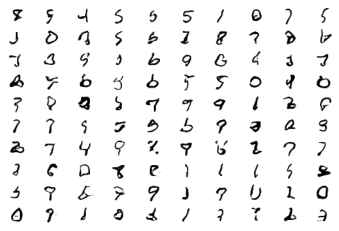

In [55]:
# input data
input = generate_latent_points(100,100)

x = g_model.predict(input)
for i in range(100):
  plt.subplot(10,10,1+i)
  plt.axis('off')
  plt.imshow(x[i,:,:,0],cmap = 'gray_r')
plt.show()

***The results are satisfactory but there is always scope for improvement***  






---




Improvements which can be done to this: 

1.   Adding Dense layers to descriminator model to make the model more strick in recogising the images which in turn will make the generator model to make for realistic images.

2.   Trying out new optimizers as well try new activation function to improve the loss function. 

